# K Nearest Neighbors: Predicting King County Housing Prices

<img src="neighbors-talking-over-fence-min.jpg" alt="Drawing" style="width: 700px;"/>

### How would you predict the price of a house that is about to go on sale?

<img src='For-sale-sign.jpg' alt="Drawing" style="width: 800px;"/>

## Similar houses should be similar in price

* Square footage
* Number of floors
* Location


## Distance as a measure of similarity

How 'far away' are houses from each other given all of their features?



## What is K-Nearest Neighbors?

**_K-Nearest Neighbors_** (or KNN, for short) is a supervised learning algorithm that can be used for both **_Classification_** and **_Regression_** tasks. KNN is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between 2 points, the more similar they are. In KNN, each column acts as a dimension. In a dataset with two columns, we can easily visualize this by treating values for one column as X coordinates and and the other as Y coordinates. Since this is a **_Supervised Learning Algorithm_**, we must also have the labels for each point in our dataset, or else we can't use this algorithm for prediction.

## Fitting the Model

KNN is unique compared to other algorithms in that it does almost nothing during the "fit" step, and all the work during the "predict" step. During the 'fit' step, KNN just stores all the training data and corresponding values. No distances are calculated at this point. 

## Making Predictions with K

All the magic happens during the 'predict' step. During this step, KNN takes a point that we want a class prediction for, and calculates the distances between that point and every single point in the training set. It then finds the `K` closest points, or **_Neighbors_**, and examines the values of each. You can think of each of the K-closest points getting a 'vote' about the predicted value. Often times the mean of all the values is taken to make a prediction about the new point.

In the following animation, K=3.

<img src='knn.gif'>

## Distance Metrics

As we explored in a previous lesson, there are different **_distance metrics_** when using KNN. For KNN, we can use **_Manhattan_**, **_Euclidean_**, or **_Minkowski Distance_**--from an algorithmic standpoint, it doesn't matter which! However, it should be noted that from a practical standpoint, these can affect our results and our overall model performance. 


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean as euc
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from visualize import generate_moons_df, preprocess, plot_boundaries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)

### Compare KNN Classifier and Logistic Regression

In [2]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocess(generate_moons_df(n_samples= 20, noise=0.1))

# fit knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled.drop('target', axis=1), y_train)

# fit logistic
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train_scaled.drop('target', axis=1), y_train);

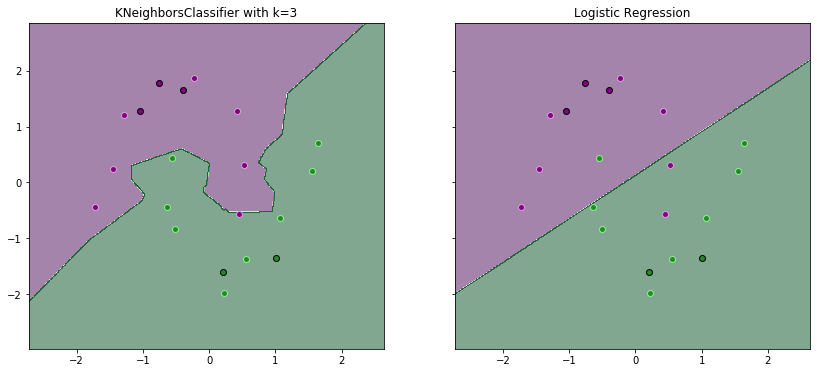

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), sharey=True)

axes[0].set_title(f'KNeighborsClassifier with k={knn.n_neighbors}')
plot_boundaries(knn, X_test_scaled, X_train_scaled, ax=axes[0], show_test=True, plot_probas=False)

axes[1].set_title('Logistic Regression')
plot_boundaries(logistic, X_test_scaled, X_train_scaled, ax=axes[1], plot_probas=False, show_test=True)

As we can see here logistic regression without any feature engineering can only give us a linear boundary but KNN can begin to follow the non-linear relationships in our data already.

The dots outlined in black represent data points from our test set. Looking at these points can we calculate our accuracy? False positives, False Negatives?

## Fitting and Transforming

Sklearn is one of the most popular ML libraries for python which gives us access to a wealth of different algorthims. All of these algorthims follow the same API

```python
model = model_object()

model.fit()

model.predict()```

## Creating our own implementation of KNN regressor

In [4]:
class KNN():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    # c is the power multiplying to
    def compare(self, train, test):
        return euc(train,test)
    
    def predict(self, x_new, neighbors):
        X = pd.DataFrame(self.X)
        x_new = pd.DataFrame(x_new)
        for x in x_new:
            nearest = [X[0:3]]
            dist = []
            print(x)
            for row in X:
                distance = euc(row, x)
                print(distance)
                dist.append(distance)
                
            X['distance_from_new_x'] = dist
            X['target'] = self.y
            X = X.sort_values(by=['distance_from_new_x'])
            x['target'] = np.mean(X['target'][:neighbors])
            
        return x_new
    pass

In [5]:
X = pd.DataFrame([[1],[2],[3],[4],[5]])
y = pd.DataFrame([[2],[4],[6],[8],[10]])
x_new = pd.DataFrame([[3.1]])

In [6]:
euc(X[0],x_new[0] )

3.1701734968294715

In [7]:


model = KNN()
model.fit(X,y)
model.predict(x_new, 3)


0
0.0


ValueError: Length of values does not match length of index

## Housing data predictions

In [8]:
house_data = pd.read_csv('data/kc-house-data.zip')

## Limit our predictions to the middle 80% of our dataset

It is easier to make predictions where the data is most dense but doing this means that any predictions made outside of the range of values we are training on will be highly suspect

In [9]:
bottom_10 = np.percentile(house_data['price'], 10)
top_10 = np.percentile(house_data['price'], 90)

house_data = house_data[(house_data['price'] > bottom_10) & (house_data['price'] < top_10)]

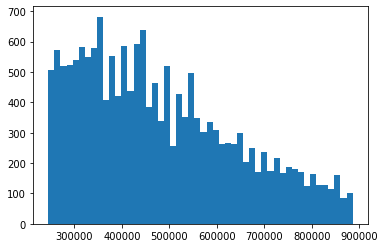

In [10]:
fig, ax = plt.subplots()
ax.hist(house_data['price'], bins=50);

In [11]:
features = ['sqft_living', 'lat', 'long']

X = house_data[features]
y = house_data['price'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Why do we need to scale our data?

In [13]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [20]:
import my_knn
my_knn = my_knn.KNN()
my_knn.fit(X_train_scaled, y_train)

In [21]:
X_train_scaled.shape

(12960, 3)

## Why is this so slow?

In [22]:
#This will run for a long time

preds = my_knn.predict(X_test_scaled, k=3)

NameError: name 'np' is not defined

In [23]:
X_test_scaled.shape

(4320, 3)

## Lets use Sklearn's KNN implementation

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
nn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

nn.fit(X_train_scaled, y_train)

sk_preds = nn.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, sk_preds))

print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 83753.62


## Choosing the optimal number of neighbors: Model behavior with increasing k

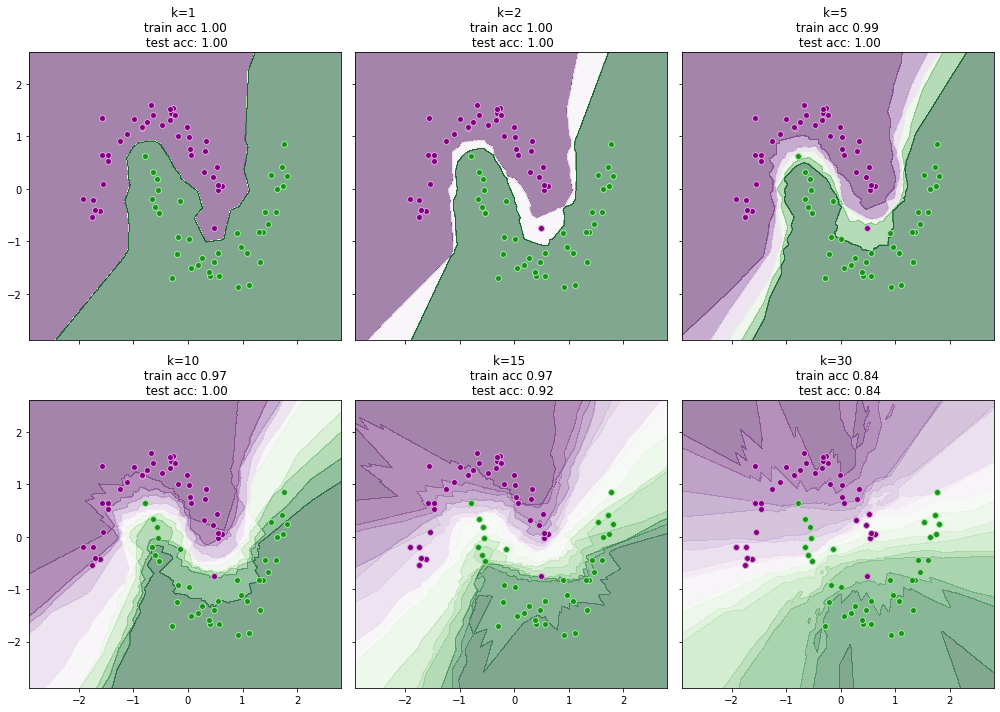

In [26]:
# These are visualizations of a classification problem

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10), sharey=True, sharex=True)

X_train_scaled_fake, X_test_scaled_fake, y_train_fake, y_test_fake = preprocess(generate_moons_df(n_samples=100, noise=0.1))

ks = [1, 2, 5, 10 , 15, 30]

for k, ax in zip(ks, axes.flatten()):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_fake.drop('target', axis=1), y_train_fake)
    
    train_preds = knn.score(X_train_scaled_fake.drop('target', axis=1), y_train_fake)
    test_preds = knn.score(X_test_scaled_fake.drop('target', axis=1), y_test_fake)
    
    ax.set_title(f'k={knn.n_neighbors} \n train acc {train_preds:.2f} \n test acc: {test_preds:.2f}')
    plot_boundaries(knn, X_test_scaled_fake, X_train_scaled_fake, ax=ax)
    
fig.tight_layout()

What can we say about the bias and variance of these models?

## Finding optimal k for King County Dataset

In [27]:
ks = range(1, 30)

test_errors = np.zeros(len(list(ks)))

for i, k in enumerate(ks):
    
    nn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)

    nn.fit(X_train_scaled, y_train)
    test_preds = nn.predict(X_test_scaled)
    
    test_errors[i] = np.sqrt(mean_squared_error(y_test, test_preds))

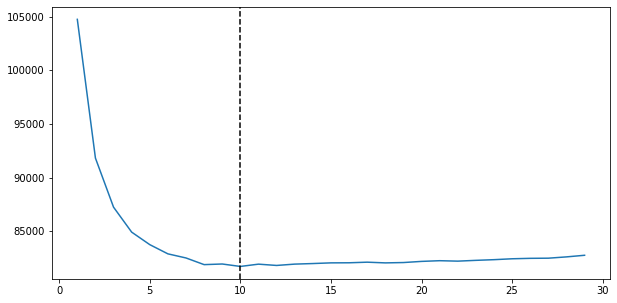

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(list(ks), test_errors)
ax.axvline(list(ks)[np.argmin(test_errors)], linestyle='--', color='black');

In [29]:
optimal_k = list(ks)[np.argmin(test_errors)]

optimal_error = np.min(test_errors)

print(f'Optimal number of Neighbors: {optimal_k} Root Mean Squared Error: {optimal_error:.2f}')

Optimal number of Neighbors: 10 Root Mean Squared Error: 81722.52
